# WSDM - KKBox's Music Recommendation
By Daffa Muhamad Azhar

In [1]:
# Menyambungkan ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
root = '/content/drive/MyDrive/Colab Notebooks/Dicoding/Dataset/Sistem Rekomendasi Musik/'

## Import Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# tabel setting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
train = pd.read_csv(root + 'train.csv')
member = pd.read_csv(root + 'members.csv')
song = pd.read_csv(root + 'songs.csv')

In [6]:
train = train.sample(frac=0.45)

## Exploratory Data Analysis 

### Train Data

In [7]:
train.head()

msno  \
5951445  jIa67T6fqY8yApVboqUC7vWcZv3hCyURII5UihRJWLI=   
3655393  6bC/+7YAKdkfscaK+zKkPOKKYj2J+e0LoEZglzL++lU=   
1319184  HrqBWTjVkh15omK7k8Ddj7e/g9N3ldWIL8LjTHv/h0s=   
4853889  tjZ6KzXUbpnCPuYWxw9cx/PrVh4/T+0PLRzINXfR1YU=   
5200493  Y1Jlu4TB76TmFRTfvMHKPavk9ePTOgxWMZsT1Jhakoo=   

                                              song_id source_system_tab  \
5951445  8VZI6DAwzIVm3JFw3n6nHEYk6NY0wxFHCEsi1nZ/3PM=        my library   
3655393  wgasyHCFASKLxUGmMef86oAgLx79VAtvOCIdD1I3N8A=        my library   
1319184  RjE1h01hgtueDdED0qSd2HBTNV8f/b8WYfIY933PR6U=        my library   
4853889  JfJD/4NNZ7ZvOmb14GYATrChJ9yve302KoMW4v/PaNI=        my library   
5200493  WHx9e8nRKiGvIPS7vi1EPJ+29oU8z23FtKx/E8bubf8=        my library   

          source_screen_name    source_type  target  
5951445                  NaN           song       0  
3655393  Local playlist more  local-library       1  
1319184           Album more          album       1  
4853889           My library  local-library       0  
5200493  Local playlist more  local-library       0

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3319838 entries, 5951445 to 2564761
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 177.3+ MB


In [9]:
train.shape

(3319838, 6)

Cek missing data

In [10]:
# Cek Missing Data
total_missing = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])
missing_data = missing_data.reset_index().rename(columns={'index': 'Column'})
missing_data

Column  Total Missing    %
0  source_screen_name         186817  5.6
1   source_system_tab          11238  0.3
2         source_type           9704  0.3
3                msno              0  0.0
4             song_id              0  0.0
5              target              0  0.0

Cek perbandingan target

In [11]:
fig = px.pie(train, names='target',)
fig.update_layout(title='Persentase dari target')
fig.show()

Hubungan `Source Type` dengan `Target`

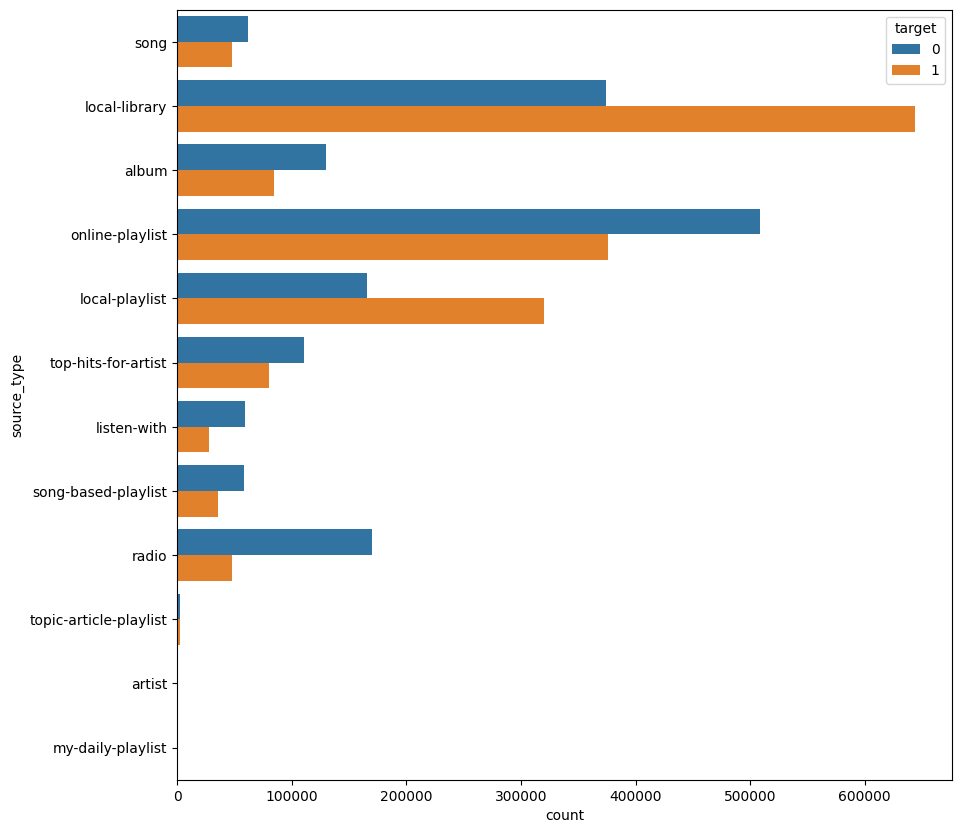

In [12]:
y = 1
x = 1
fig, ax = plt.subplots(y, x, figsize = (10,10))
plot = sns.countplot(data=train, y='source_type', hue="target", ax=ax)

Hubungan `Source System Tab` dengan `Target`

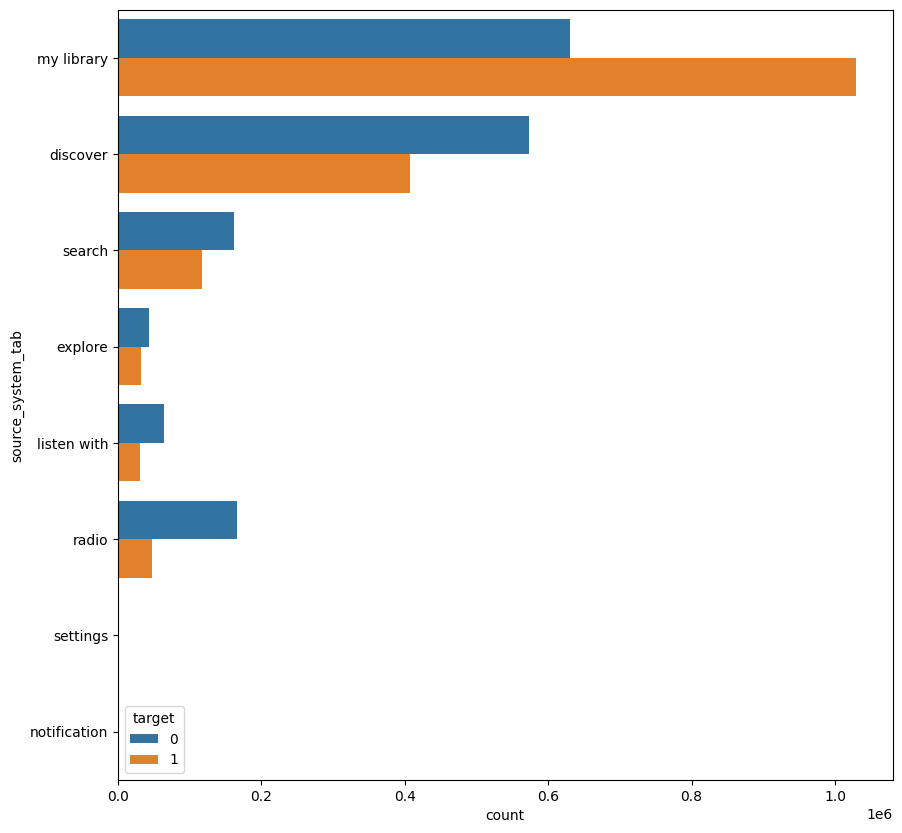

In [13]:
y = 1
x = 1
fig, ax = plt.subplots(y, x, figsize = (10,10))
plot = sns.countplot(data=train, y='source_system_tab', hue="target", ax=ax)

Hubungan `Source Screen Name` dengan `Target`

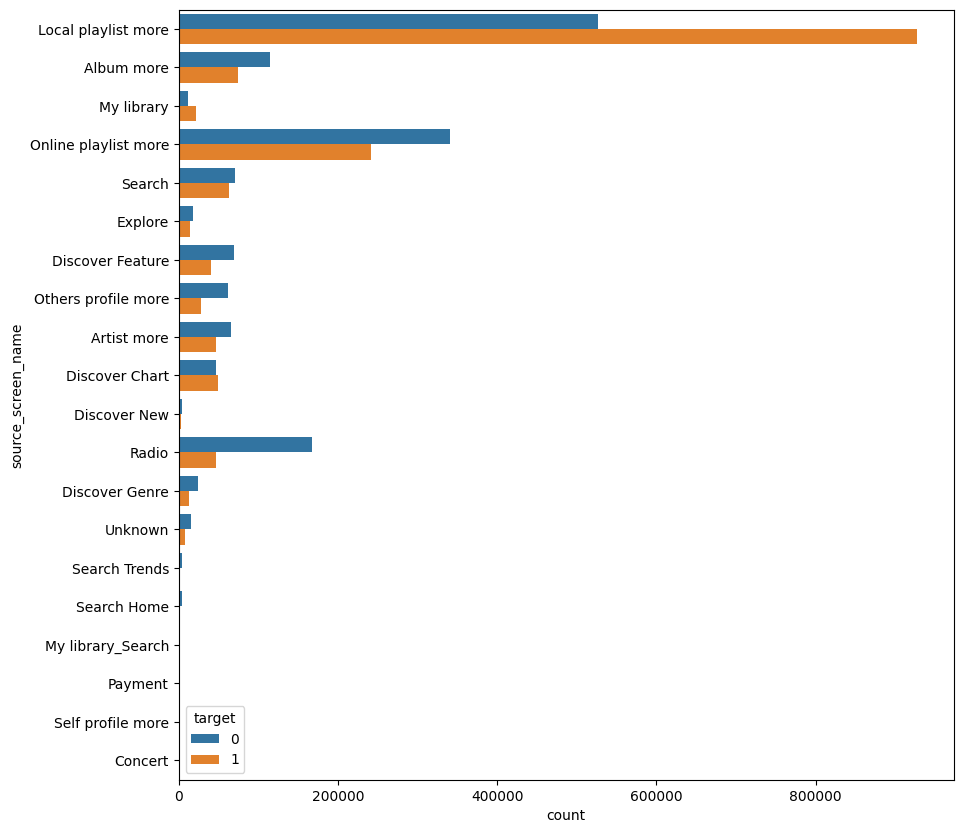

In [14]:
y = 1
x = 1
fig, ax = plt.subplots(y, x, figsize = (10,10))
plot = sns.countplot(data=train, y='source_screen_name', hue="target", ax=ax)

### Members Data

In [16]:
member.head()

msno  city  bd gender  \
0  XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=     1   0    NaN   
1  UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=     1   0    NaN   
2  D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=     1   0    NaN   
3  mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=     1   0    NaN   
4  q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=     1   0    NaN   

   registered_via  registration_init_time  expiration_date  
0               7                20110820         20170920  
1               7                20150628         20170622  
2               4                20160411         20170712  
3               9                20150906         20150907  
4               4                20170126         20170613

In [17]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


Dapat dilihat bahwa tipe data registration dan expiration masih berupa integer sehingga harus diubah terlebih dahulu

In [18]:
member['registration_init_time']=pd.to_datetime(member.registration_init_time, format='%Y%m%d')
member['expiration_date']=pd.to_datetime(member.expiration_date, format='%Y%m%d')

In [19]:
member.describe()

city            bd  registered_via
count  34403.000000  34403.000000    34403.000000
mean       5.371276     12.280935        5.953376
std        6.243929     18.170251        2.287534
min        1.000000    -43.000000        3.000000
25%        1.000000      0.000000        4.000000
50%        1.000000      0.000000        7.000000
75%       10.000000     25.000000        9.000000
max       22.000000   1051.000000       16.000000

In [20]:
# Cek Missing Data
total_missing = member.isnull().sum().sort_values(ascending=False)
percent_1 = member.isnull().sum()/member.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])
missing_data = missing_data.reset_index().rename(columns={'index': 'Column'})
missing_data

Column  Total Missing     %
0                  gender          19902  57.8
1                    msno              0   0.0
2                    city              0   0.0
3                      bd              0   0.0
4          registered_via              0   0.0
5  registration_init_time              0   0.0
6         expiration_date              0   0.0

Persebaran Umur pada Member

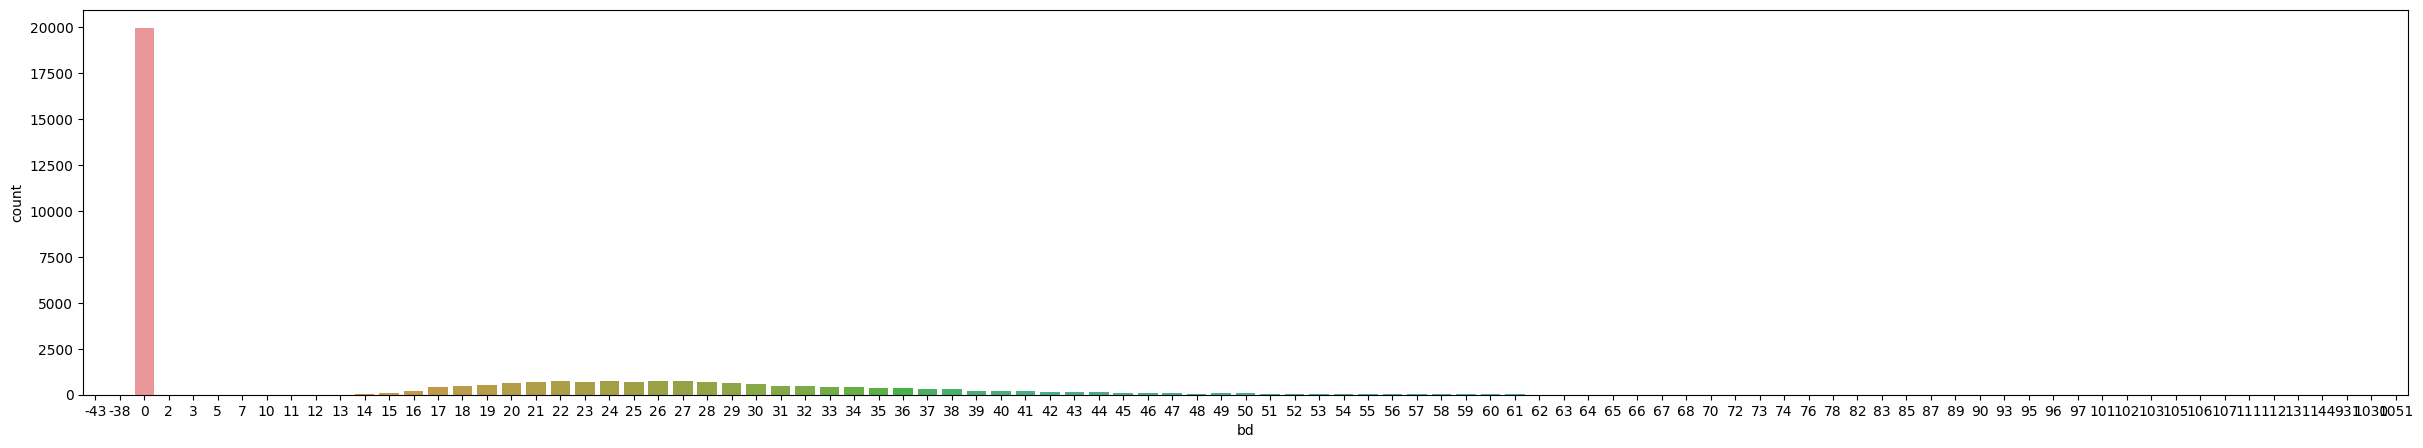

In [21]:
y = 1
x = 1
fig, ax = plt.subplots(y, x, figsize = (30,5))
plot = sns.countplot(data=member, x='bd', ax=ax)

Terdapat Outlier pada kolom `bd`.

Persebaran Gender pada Member

In [22]:
fig = px.pie(member, names='gender',)
fig.update_layout(title='Persentase dari Gender')
fig.show()

Terdapat `Null` gender yang diasumsikan bahwa mereka memilih untuk tidak memiliki jenis kelamin.

Persebaran kota pada member

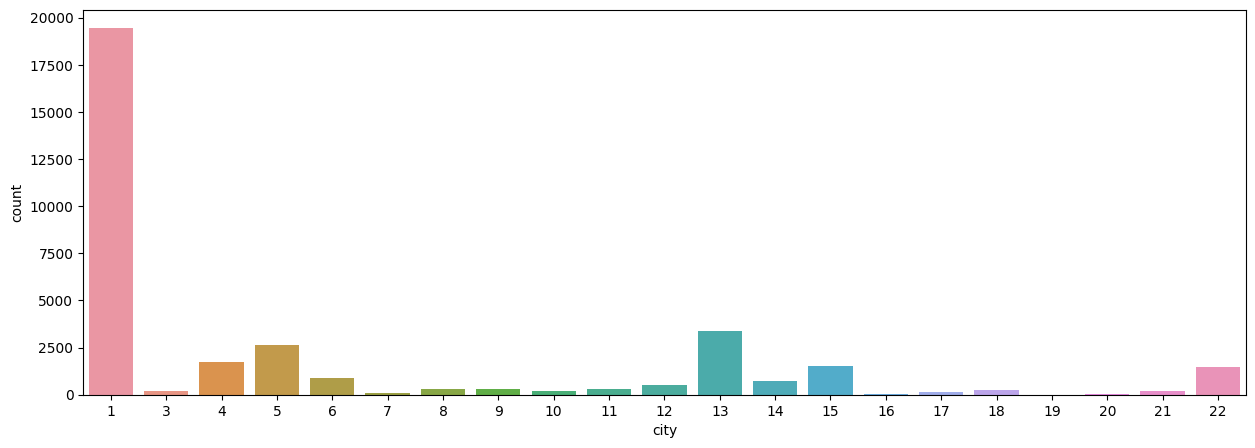

In [23]:
y = 1
x = 1
fig, ax = plt.subplots(y, x, figsize = (15,5))
plot = sns.countplot(data=member, x='city', ax=ax)

Persebaran `registered via` pada Member

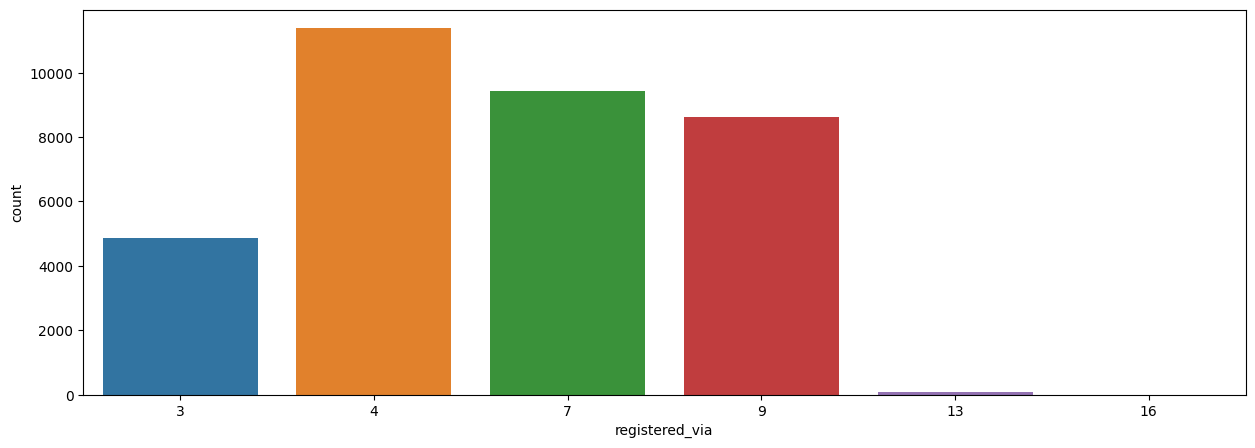

In [24]:
y = 1
x = 1
fig, ax = plt.subplots(y, x, figsize = (15,5))
plot = sns.countplot(data=member, x='registered_via', ax=ax)

Menghitung total pendaftar baik harian maupun bulanan

In [25]:
timestamp = member.groupby(['registration_init_time'], as_index=False)['msno'].count().sort_values('registration_init_time', ascending=True).rename(columns={'msno': 'Jumlah Pendaftar'})

In [26]:
timestamp.head()

registration_init_time  Jumlah Pendaftar
0             2004-03-26                 2
1             2004-03-27                11
2             2004-03-28                13
3             2004-03-29                 4
4             2004-03-30                 7

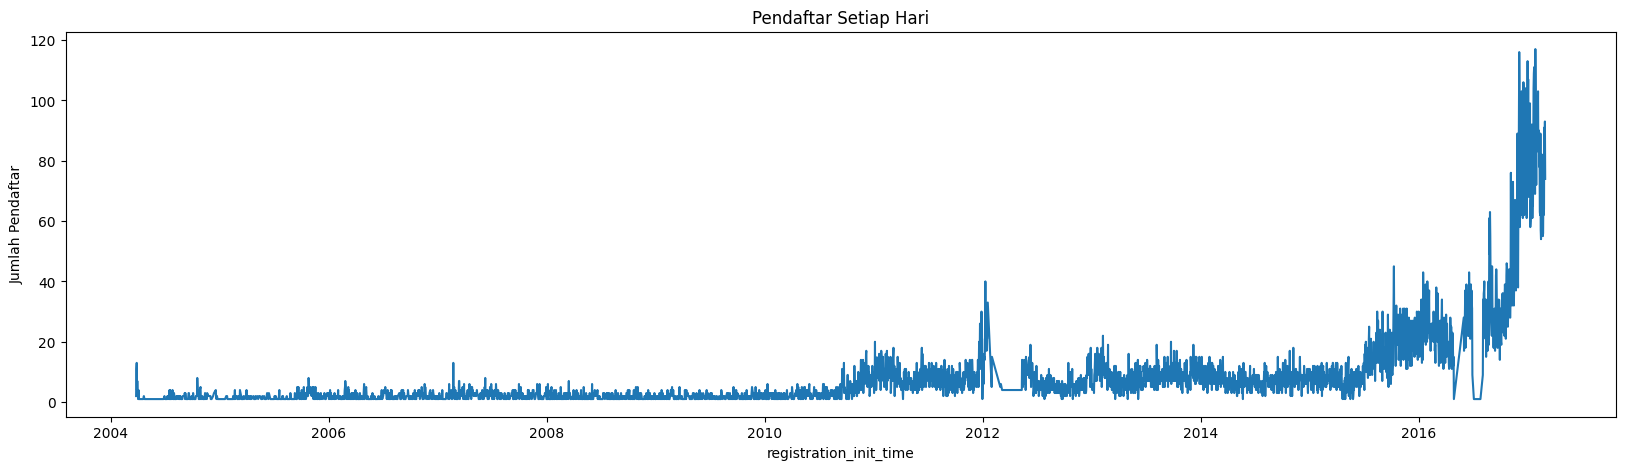

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (20,5))

sns.lineplot(x="registration_init_time", y='Jumlah Pendaftar', data=timestamp, ax=ax)
ax.title.set_text('Pendaftar Setiap Hari')

In [28]:
timestamp_monthly = timestamp.groupby(pd.Grouper(key='registration_init_time', freq='M')).agg({'Jumlah Pendaftar':'sum'}).reset_index()

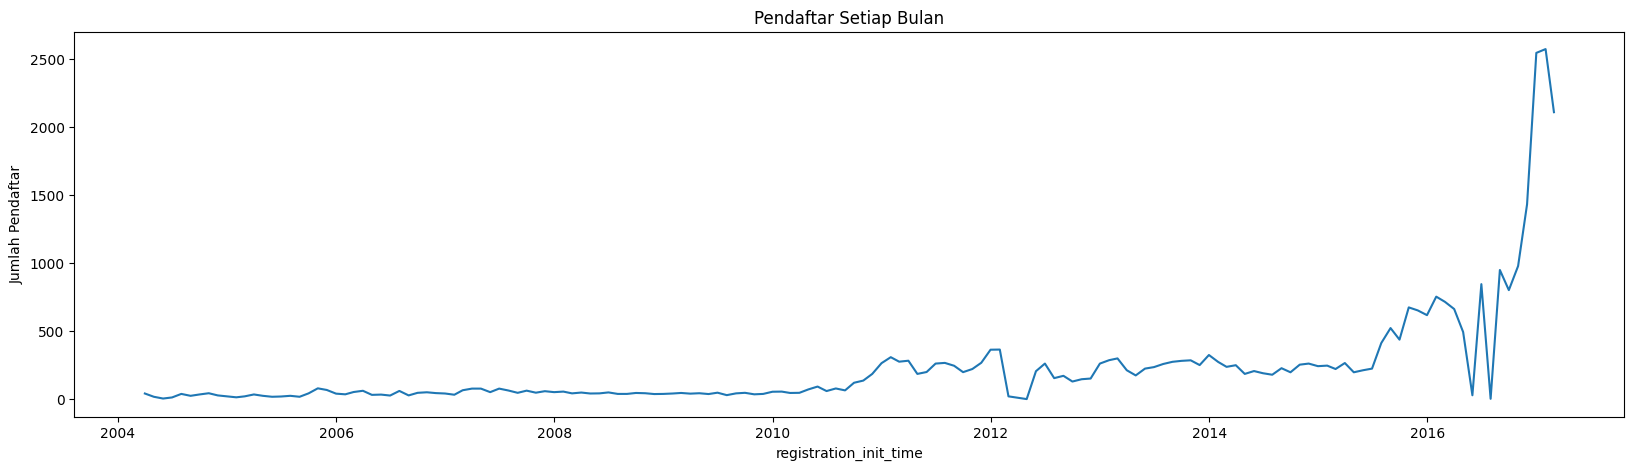

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (20,5))

sns.lineplot(x="registration_init_time", y='Jumlah Pendaftar', data=timestamp_monthly, ax=ax)
ax.title.set_text('Pendaftar Setiap Bulan')

### Songs Data

In [30]:
song.head()

song_id  song_length genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1  o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2  DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3  dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4  W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   

        artist_name                            composer     lyricist  language  
0  張信哲 (Jeff Chang)                                  董貞          何啟弘       3.0  
1         BLACKPINK  TEDDY|  FUTURE BOUNCE|  Bekuh BOOM        TEDDY      31.0  
2      SUPER JUNIOR                                 NaN          NaN      31.0  
3             S.H.E                                 湯小康          徐世珍       3.0  
4              貴族精選                         Traditional  Traditional      52.0

In [31]:
song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [32]:
song.describe()

song_length      language
count  2.296320e+06  2.296319e+06
mean   2.469935e+05  3.237800e+01
std    1.609200e+05  2.433241e+01
min    1.850000e+02 -1.000000e+00
25%    1.836000e+05 -1.000000e+00
50%    2.266270e+05  5.200000e+01
75%    2.772690e+05  5.200000e+01
max    1.217385e+07  5.900000e+01

Cek Missing Data

In [33]:
# Cek Missing Data
total_missing = song.isnull().sum().sort_values(ascending=False)
percent_1 = song.isnull().sum()/song.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])
missing_data = missing_data.reset_index().rename(columns={'index': 'Column'})
missing_data

Column  Total Missing     %
0     lyricist        1945268  84.7
1     composer        1071354  46.7
2    genre_ids          94116   4.1
3     language              1   0.0
4      song_id              0   0.0
5  song_length              0   0.0
6  artist_name              0   0.0

Genre yang paling banyak

In [34]:
genre = song.groupby(['genre_ids'], as_index=False)['song_id'].count().sort_values('song_id', ascending=False).rename(columns={'song_id': 'total'})

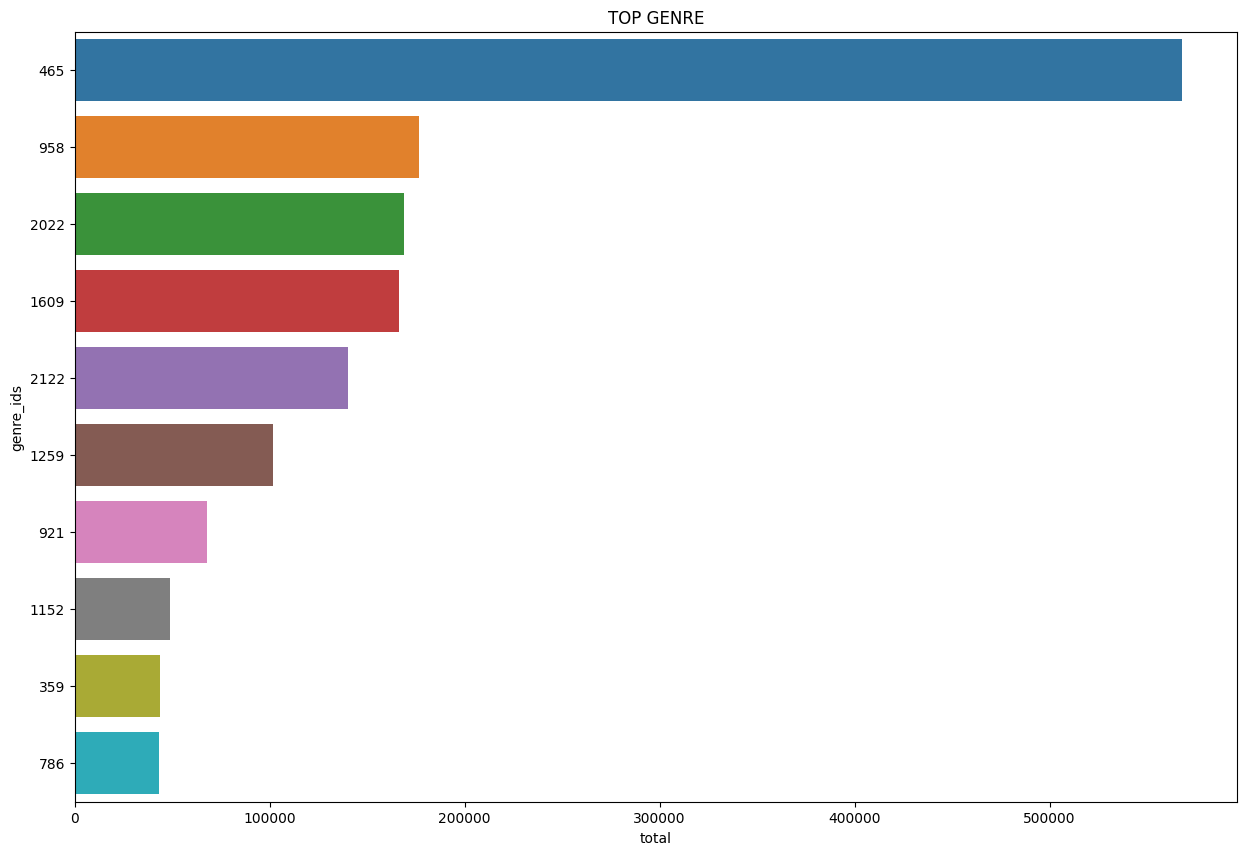

In [35]:
fig, ax = plt.subplots(1, 1, figsize = (15,10))

sns.barplot(x="total", y='genre_ids', data=genre.head(10), ax=ax)
ax.title.set_text('TOP GENRE')

In [36]:
del genre

Bahasa yang paling banyak

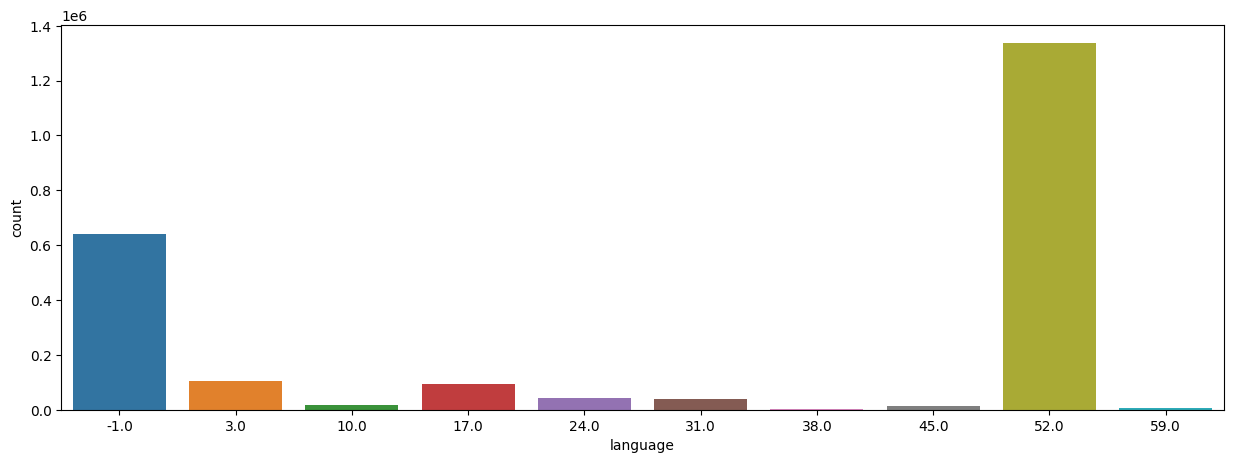

In [37]:
y = 1
x = 1
fig, ax = plt.subplots(y, x, figsize = (15,5))
plot = sns.countplot(data=song, x='language', ax=ax)

## Data Preparation

Merge Dataset

In [38]:
train = pd.merge(train, song, on='song_id', how='left')

In [39]:
train = pd.merge(train, member, on='msno', how='left')

In [40]:
del song
del member

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3319838 entries, 0 to 3319837
Data columns (total 18 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   msno                    object        
 1   song_id                 object        
 2   source_system_tab       object        
 3   source_screen_name      object        
 4   source_type             object        
 5   target                  int64         
 6   song_length             float64       
 7   genre_ids               object        
 8   artist_name             object        
 9   composer                object        
 10  lyricist                object        
 11  language                float64       
 12  city                    int64         
 13  bd                      int64         
 14  gender                  object        
 15  registered_via          int64         
 16  registration_init_time  datetime64[ns]
 17  expiration_date         datetime64[ns]
dtypes:

In [42]:
print("Total Data Pada Dataset :", train.shape[0])
print("Total Fitur Pada Dataset :", train.shape[1])

Total Data Pada Dataset : 3319838
Total Fitur Pada Dataset : 18


In [43]:
# Cek Missing Data
total_missing = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])
missing_data = missing_data.reset_index().rename(columns={'index': 'Column'})
missing_data

Column  Total Missing     %
0                 lyricist        1430998  43.1
1                   gender        1333196  40.2
2                 composer         754578  22.7
3       source_screen_name         186817   5.6
4                genre_ids          53344   1.6
5        source_system_tab          11238   0.3
6              source_type           9704   0.3
7                 language             77   0.0
8              song_length             59   0.0
9              artist_name             59   0.0
10                      bd              0   0.0
11  registration_init_time              0   0.0
12          registered_via              0   0.0
13                    msno              0   0.0
14                    city              0   0.0
15                 song_id              0   0.0
16                  target              0   0.0
17         expiration_date              0   0.0

Mengisi `NULL` value pada kolom object dengan `UNKNOWN` dan mengisi nilai 0 untuk tipe data numerikal karena data tidak dapat dipastikan atau dilakukan agregasi.

In [44]:
for col in train.select_dtypes(include=['object']).columns:
    train[col] = train[col].fillna('UNKNOWN')

In [45]:
train = train.fillna(value=0)

In [46]:
# Cek Missing Data
total_missing = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total Missing', '%'])
missing_data = missing_data.reset_index().rename(columns={'index': 'Column'})
missing_data

Column  Total Missing    %
0                     msno              0  0.0
1                  song_id              0  0.0
2   registration_init_time              0  0.0
3           registered_via              0  0.0
4                   gender              0  0.0
5                       bd              0  0.0
6                     city              0  0.0
7                 language              0  0.0
8                 lyricist              0  0.0
9                 composer              0  0.0
10             artist_name              0  0.0
11               genre_ids              0  0.0
12             song_length              0  0.0
13                  target              0  0.0
14             source_type              0  0.0
15      source_screen_name              0  0.0
16       source_system_tab              0  0.0
17         expiration_date              0  0.0

In [47]:
train.head()

msno  \
0  jIa67T6fqY8yApVboqUC7vWcZv3hCyURII5UihRJWLI=   
1  6bC/+7YAKdkfscaK+zKkPOKKYj2J+e0LoEZglzL++lU=   
2  HrqBWTjVkh15omK7k8Ddj7e/g9N3ldWIL8LjTHv/h0s=   
3  tjZ6KzXUbpnCPuYWxw9cx/PrVh4/T+0PLRzINXfR1YU=   
4  Y1Jlu4TB76TmFRTfvMHKPavk9ePTOgxWMZsT1Jhakoo=   

                                        song_id source_system_tab  \
0  8VZI6DAwzIVm3JFw3n6nHEYk6NY0wxFHCEsi1nZ/3PM=        my library   
1  wgasyHCFASKLxUGmMef86oAgLx79VAtvOCIdD1I3N8A=        my library   
2  RjE1h01hgtueDdED0qSd2HBTNV8f/b8WYfIY933PR6U=        my library   
3  JfJD/4NNZ7ZvOmb14GYATrChJ9yve302KoMW4v/PaNI=        my library   
4  WHx9e8nRKiGvIPS7vi1EPJ+29oU8z23FtKx/E8bubf8=        my library   

    source_screen_name    source_type  target  song_length genre_ids  \
0              UNKNOWN           song       0     210312.0       465   
1  Local playlist more  local-library       1     239351.0       359   
2           Album more          album       1     210964.0       921   
3           My library  local-library       0     304065.0       465   
4  Local playlist more  local-library       0     271986.0   921|465   

         artist_name                                composer lyricist  \
0              T-ARA                                 UNKNOWN  UNKNOWN   
1          James Bay  James Bay| Jimmy Hogarth| Steve McEwan  UNKNOWN   
2    Various Artists                                 UNKNOWN  UNKNOWN   
3  黃小琥 (Tiger Huang)                                     伍思凱      王中言   
4   「女人30情定水舞間」電視原聲帶                                     陳零九      陳零九   

   language  city  bd   gender  registered_via registration_init_time  \
0      31.0    21  23   female               4             2016-12-24   
1      52.0     6  21   female               3             2014-04-15   
2       3.0     4   0  UNKNOWN               7             2015-09-09   
3       3.0     5  34     male               9             2011-03-22   
4       3.0    12  21     male               3             2014-03-22   

  expiration_date  
0      2017-07-09  
1      2017-10-16  
2      2017-10-02  
3      2017-09-27  
4      2017-10-04

In [48]:
train['registration_init_time_year'] = train['registration_init_time'].dt.year
train['registration_init_time_month'] = train['registration_init_time'].dt.month
train['registration_init_time_day'] = train['registration_init_time'].dt.day

train['expiration_date_year'] = train['expiration_date'].dt.year
train['expiration_date_month'] = train['expiration_date'].dt.month
train['expiration_date_day'] = train['expiration_date'].dt.day

In [49]:
train = train.drop(columns=['registration_init_time','expiration_date'])

In [50]:
# Object data to category
for col in train.select_dtypes(include=['object']).columns:
    train[col] = train[col].astype('category')
    
# Encoding categorical features
for col in train.select_dtypes(include=['category']).columns:
    train[col] = train[col].cat.codes

In [51]:
train.shape

(3319838, 22)

## Modeling

In [52]:
# import libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingRegressor
import lightgbm as lgb
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Splitting Dataset

In [53]:
# Drop Target dan ID
X = train.drop(['target'], axis=1)
Y = train.target

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [55]:
print('Shape X_train : ', X_train.shape)
print('Shape X_test : ', X_test.shape)
print('Shape y_train : ', y_train.shape)
print('Shape y_test : ', y_test.shape)

Shape X_train :  (2323886, 21)
Shape X_test :  (995952, 21)
Shape y_train :  (2323886,)
Shape y_test :  (995952,)


### Pelatihan

#### XGBoost

In [56]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 15,
    'learning_rate': 0.001,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 1,
    'min_child_weight': 1,
    'reg_alpha': 0,
    'reg_lambda': 1
}

In [57]:
xgb_model = xgb.XGBClassifier(**params)

In [58]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### LightGBM

In [59]:
params = {
    'objective': 'binary',
    'boosting': 'gbdt',
    'learning_rate': 0.001 ,
    'verbose': 0,
    'num_leaves': 2**8,
    'bagging_fraction': 0.95,
    'bagging_freq': 1,
    'bagging_seed': 1,
    'feature_fraction': 0.9,
    'feature_fraction_seed': 1,
    'max_bin': 256,
    'num_rounds': 80,
    'metric' : 'auc'
}

In [76]:
lgbm_model = lgb.LGBMClassifier(**params)

In [77]:
lgbm_model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:177: UserWarning:

Found `num_rounds` in params. Will use it instead of argument



[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] num_iterations is set=80, num_rounds=80 will be ignored. Current value: num_iterations=80
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current 

LGBMClassifier(bagging_fraction=0.95, bagging_freq=1, bagging_seed=1,
               boosting='gbdt', feature_fraction=0.9, feature_fraction_seed=1,
               learning_rate=0.001, max_bin=256, metric='auc', num_leaves=256,
               num_rounds=80, objective='binary', verbose=0)

## Evaluasi

### XGBoost

In [61]:
y_pred_xgb = xgb_model.predict_proba(X_test)[::,1]

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

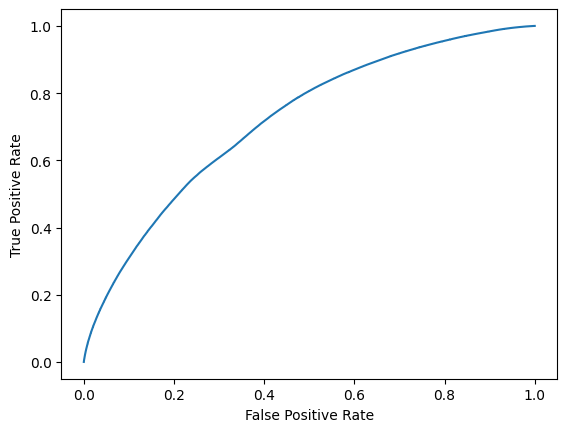

In [63]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
# Calculate the Youden's J statistic
youdenJ = tpr - fpr

# Find the optimal threshold
index = np.argmax(youdenJ)
thresholdOpt = round(thresholds[index], ndigits = 4)
youdenJOpt = round(youdenJ[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with Youden J statistic: {}'.format(thresholdOpt, youdenJOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 0.4966999888420105 with Youden J statistic: 0.3173
FPR: 0.4146, TPR: 0.7319


In [65]:
y_pred_convert = y_pred_xgb.copy()

In [66]:
for i in range(0, len(y_pred_convert)):
  if y_pred_convert[i] > thresholdOpt:
    y_pred_convert[i] = 1
  else:
    y_pred_convert[i] = 0

#### Hasil Evaluasi XGBoost

In [67]:
print("Accuracy XGBoost: ", accuracy_score(y_test, y_pred_convert))
print("Precision XGBoost: ", precision_score(y_test, y_pred_convert, average='macro'))
print("Recall XGBoost: ",recall_score(y_test, y_pred_convert, average='macro'))

Accuracy XGBoost:  0.6591863864925217
Precision XGBoost:  0.6621466862179803
Recall XGBoost:  0.658604448959728


In [68]:
score = roc_auc_score(y_test, y_pred_convert)

print(f"ROC AUC XGBoost: {score}")

ROC AUC XGBoost: 0.658604448959728


In [69]:
f1_rf = f1_score(y_test, y_pred_convert)
print(f"F1 Score XGBoost: {f1_rf}")

F1 Score XGBoost: 0.6838486500180694


In [70]:
# Confusion Matrix Random Forest
print("Cofusion Matrix XGBoost: \n", confusion_matrix(y_test, y_pred_convert))

Cofusion Matrix XGBoost: 
 [[289413 204579]
 [134855 367105]]


### LightGBM

In [78]:
y_pred_lgbm = lgbm_model.predict_proba(X_test)[::,1]

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lgbm)

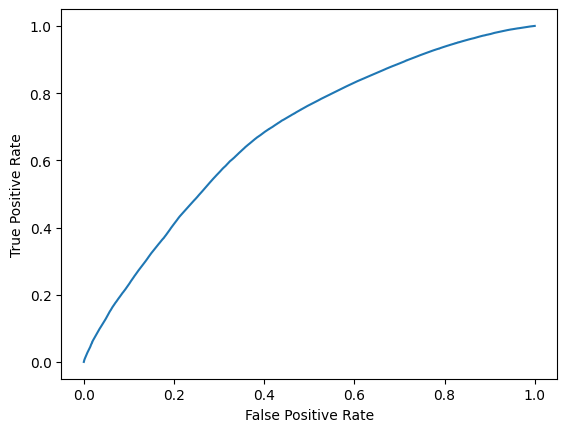

In [80]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
# Calculate the Youden's J statistic
youdenJ = tpr - fpr

# Find the optimal threshold
index = np.argmax(youdenJ)
thresholdOpt = round(thresholds[index], ndigits = 4)
youdenJOpt = round(youdenJ[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with Youden J statistic: {}'.format(thresholdOpt, youdenJOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 0.5027 with Youden J statistic: 0.284
FPR: 0.3836, TPR: 0.6676


In [82]:
y_pred_convert = y_pred_lgbm.copy()

In [83]:
for i in range(0, len(y_pred_convert)):
  if y_pred_convert[i] > thresholdOpt:
    y_pred_convert[i] = 1
  else:
    y_pred_convert[i] = 0

#### Hasil Evaluasi LightGBM

In [84]:
print("Accuracy LightGBM: ", accuracy_score(y_test, y_pred_convert))
print("Precision LightGBM: ", precision_score(y_test, y_pred_convert, average='macro'))
print("Recall LightGBM: ",recall_score(y_test, y_pred_convert, average='macro'))

Accuracy LightGBM:  0.6421825549825695
Precision LightGBM:  0.6423862036000859
Recall LightGBM:  0.6419740710279572


In [85]:
score = roc_auc_score(y_test, y_pred_convert)

print(f"ROC AUC LightGBM: {score}")

ROC AUC LightGBM: 0.6419740710279572


In [86]:
f1_rf = f1_score(y_test, y_pred_convert)
print(f"F1 Score LightGBM: {f1_rf}")

F1 Score LightGBM: 0.6530070952784802


In [87]:
# Confusion Matrix Random Forest
print("Cofusion Matrix LightGBM: \n", confusion_matrix(y_test, y_pred_convert))

Cofusion Matrix LightGBM: 
 [[304257 189735]
 [166634 335326]]
